<a href="https://colab.research.google.com/github/psandoval123/MetNum2024I/blob/main/Lab5/psandoval_group18_CubicEquation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3+bx^+cx +d = 0$$

using Cubic equation – General cubic formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3+bx^+cx +d = 0$$

Including plots, expalnations, solution code and test cases



# **Explanation**

The **solve_cubic** function solves a cubic equation of the form **x^3 + bx^2 + cx + d = 0**  by means of calculation the roots of a cubic equation using Cardano's method, which involves complex numbers and the concept of cube roots. Here's an explanation of how the code works:

* To solve the cubic equation, we first calculate two discriminants:
  *   d_0 is determined by subtracting three times the coefficient c from the square of b, i.e., d_0 = b^2 - 3*c.
  *   d_1 is calculated using the formula: d_1 = 2*b^3 - 9*b*c + 27*d.

* We then check for special cases:

  If both d_0 and d_1 are equal to zero, it indicates that all three roots are identical. In such a scenario, the function returns three identical roots, which are all equal to -b/3.

* Next, we compute an intermediate value denoted as C:

  C is computed using the following formula: C = (d_1 + sqrt(d_1^2 - 4*d_0^3)) / (2^(1/3)).

* We check whether C is zero:

  If C is equal to zero, it signifies a special case, and we need to change the sign of C. In this situation, C is recalculated as C = (d_1 - sqrt(d_1^2 - 4*d_0^3)) / (2^(1/3)).

* With C determined, we proceed to calculate the roots using Cardano's method:

  We initialize an empty list called roots to store the roots.
  A complex constant ep is defined as (-1 + sqrt(-3))/2, which is used for calculating cube roots.
  We iterate through a loop three times (for k in the range of 3).
  For each iteration, we compute a root using the Cardano formula: root = -(1/3) * (b + ep^k * C + d_0 / (ep^k * C)), where ep^k represents different cube roots for each iteration.
  Each calculated root is appended to the roots list.
* Finally, the function returns the roots as a tuple containing the three calculated values.


In [ ]:
def cubic(b,c,d,x):
    """Calulate the value of the  qubic equation, v = x**3 + bx**2 + c*x +d

    Parameters
    ----------
    b, c, d  : float
       Coefficients

    Returns
    -------
    v : float """

    v = x**3 + b*x**2 + c*x +d

    return v

In [ ]:
import numpy as np
x = np.arange(-3.5, 2, 0.001)
z = np.zeros(len(x))
y = cubic(4,5,1,x)

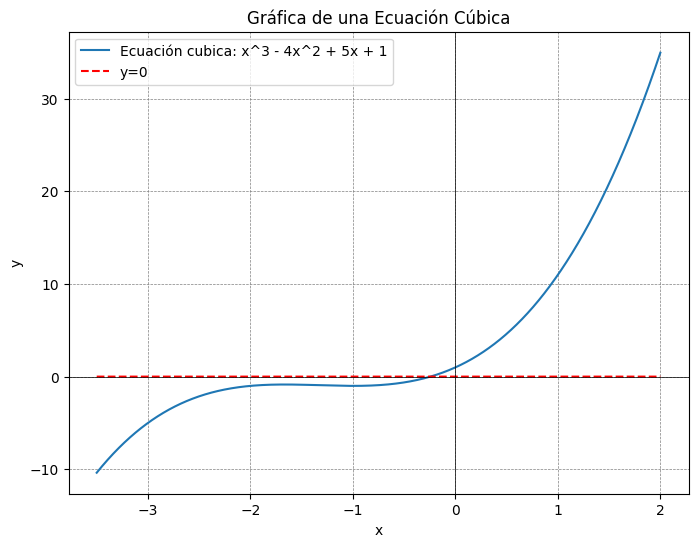

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Ecuación cubica: x^3 - 4x^2 + 5x + 1")
plt.plot(x, z, 'r--', label='y=0')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de una Ecuación Cúbica')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
import math
import cmath
def solve_cubic(b,c,d):
    """Solve a cubic equation, x**3 + bx**2 + c*x +d = 0.

    Parameters
    ----------
    b, c,d : float
       Coefficients

    Returns
    -------
    x1, x2,x3 : float or complex
       Roots.  """

    d_0 = b**2-3*c
    d_1 = 2*b**3-9*b*c+27*d

    if d_0 == 0 and d_1 == 0:
      return -b/3, -b/3, -b/3

    intern_root = cmath.sqrt(d_1**2-4*d_0**3)
    C = pow((d_1+intern_root)/2, 1/3)
    if C == 0:
      C = pow((d_1-intern_root)/2, 1/3)

    primitive_cube_root = complex(-1/2, pow(3, 1/2)/2)

    x1 = -1/3*(b+C+d_0/C)
    x2 = -1/3*(b+C*primitive_cube_root+d_0/(C*primitive_cube_root))
    x3 = -1/3*(b+C*primitive_cube_root**2+d_0/(C*primitive_cube_root**2))

    return x1,x2,x3

Bulit test cases that include

$$(x-1) \left( x + \frac{1}{2} + i \frac{\sqrt{3}}{2}\right) \left( x + \frac{1}{2} - i \frac{\sqrt{3}}{2}\right) =   x^3 -1 =  0  $$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1 = 0 $$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1 = 0 $$

$$ (x+2)^2 (x-1) = x^3 + 3 x^2 - 4 = 0  $$
three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Last digits:** Sebastian: 7 , Karen: 9, Nicolas: 0

In [ ]:
from numpy import allclose

variants = [{'b': 0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0, 'd':-1.0},
            {'b': -1.0, 'c': 1.0, 'd':-1.0},
            {'b':  3.0, 'c': 0.0, 'd':-4.0},
            {'b':  7.0, 'c': 9.0, 'd':0.0},  #roots in the last digits
            {'b':  2.0, 'c': 9.0, 'd': 1.0}, #roots in multiplicity two
            {'b':  326+4j, 'c': 50-3j, 'd': 6+1j}, #complex roots with large b
            {'b':  4e-12 + 4e-20j, 'c': 50-3j, 'd': 6+1j}, #complex roots with small b
            ]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True
True
True
True
True
True
True
True


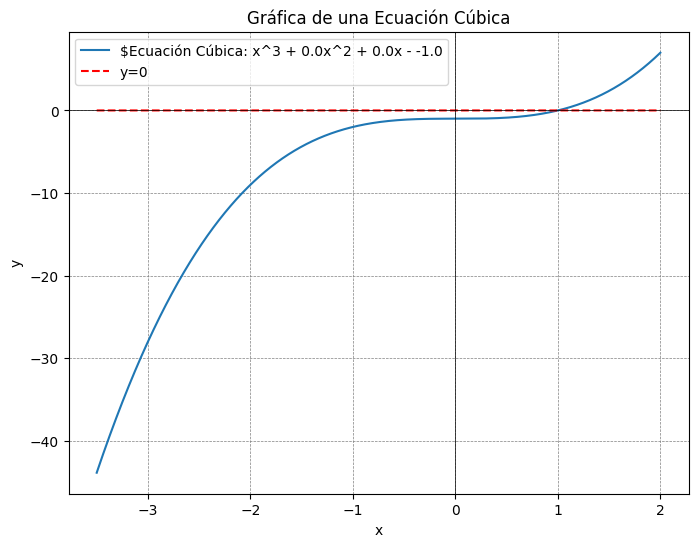

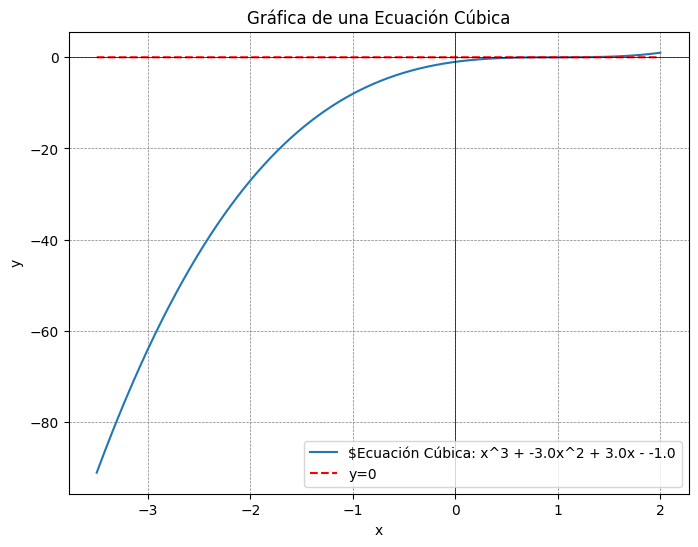

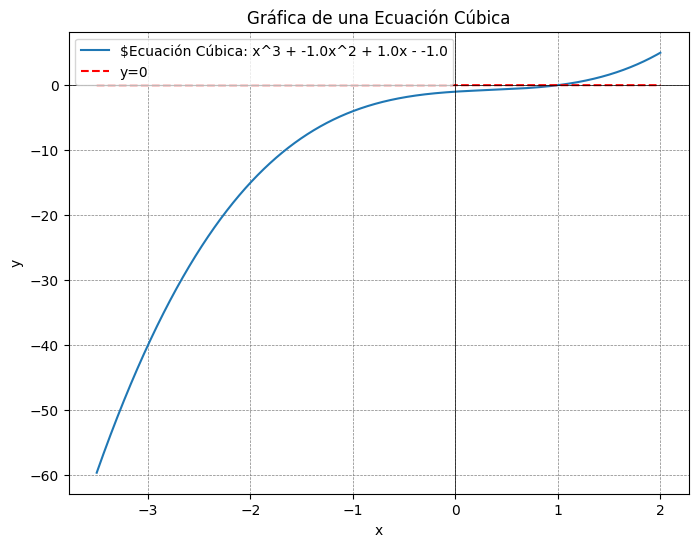

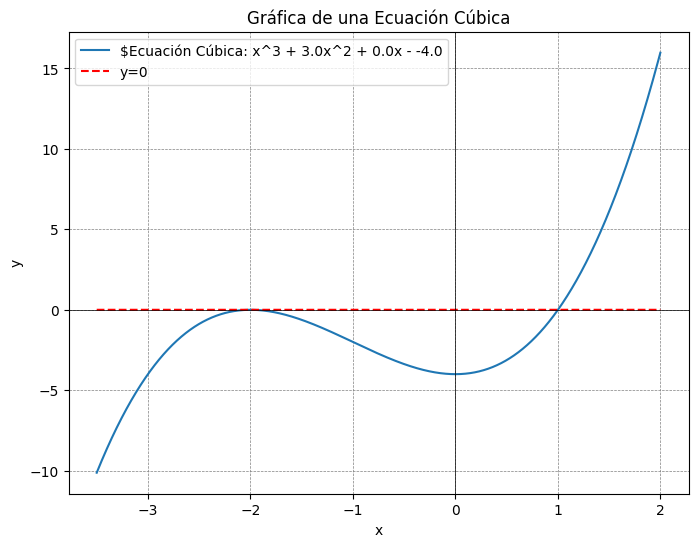

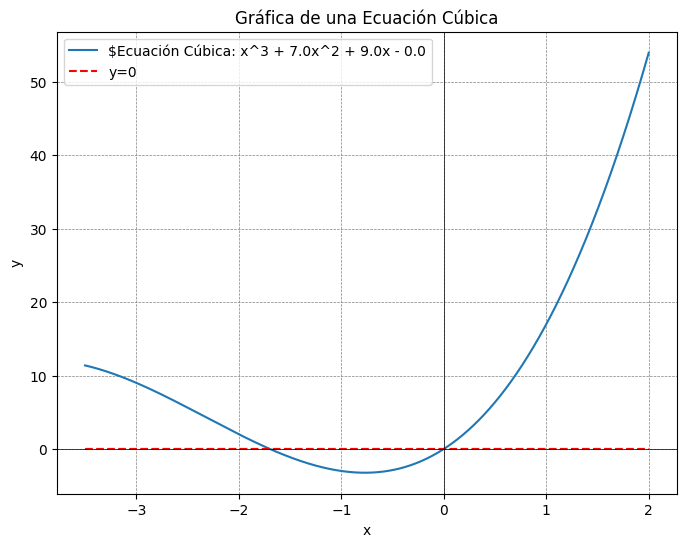

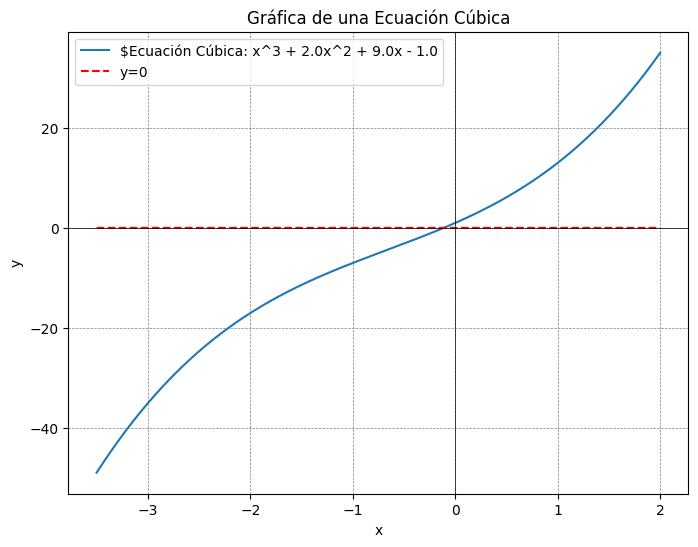

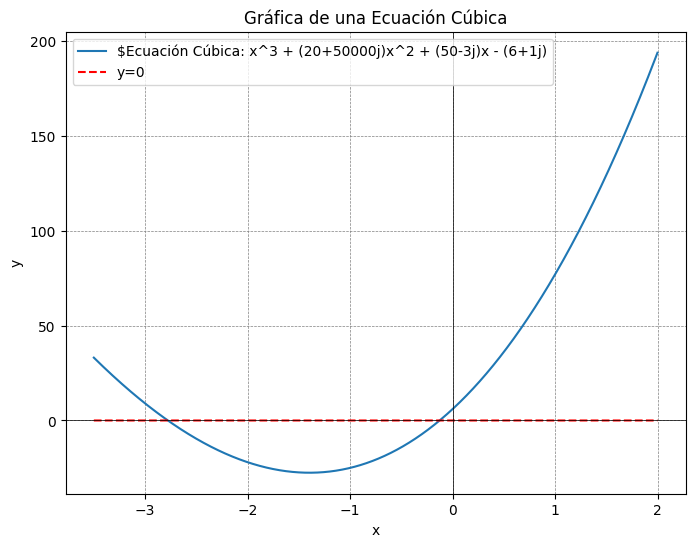

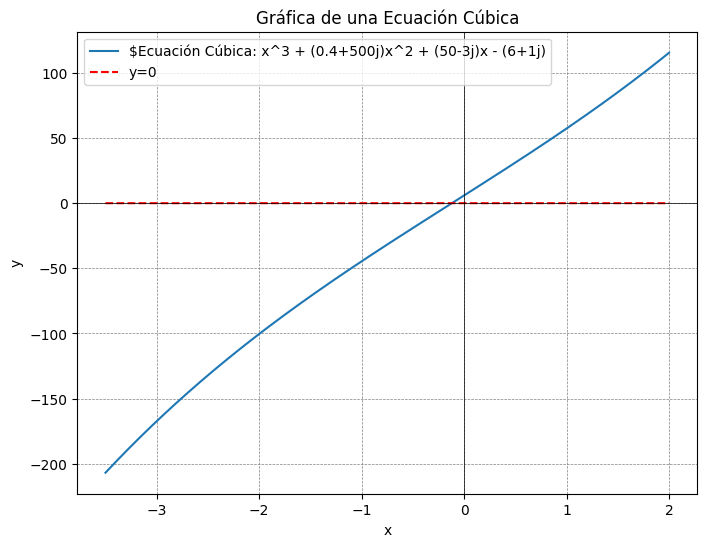

In [ ]:
def graficador(b, c, d):
  x = np.arange(-3.5, 2, 0.001)
  z = np.zeros(len(x))
  y = cubic(b,c,d,x)

  plt.figure(figsize=(8, 6))
  plt.plot(x, y, label= f'$Ecuación Cúbica: x^3 + {b}x^2 + {c}x - {d}')
  plt.plot(x, z, 'r--', label='y=0')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Gráfica de una Ecuación Cúbica')
  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(color='gray', linestyle='--', linewidth=0.5)
  plt.legend()
  plt.show()

for var in variants:
  graficador(var['b'], var['c'], var['d'])

 Publish the notebook in as **pperezp_groupN_CubicEquation.ipynb** at **MetNumUN2023II/Lab5** and submit only the code of **solve_cubic(b, c,d)** in UNcode Quiz Cubic Equation.